<a href="https://colab.research.google.com/github/pspereira-92/Cancer_Diagnostic_Data_Set/blob/main/projeto_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto sobre câncer de mama

Projeto com o objetivo de criar um algoritmo capaz de prever se o diagnóstico de câncer de mama será benigno ou maligno.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dado=pd.read_csv('/content/drive/MyDrive/Python/Cursos/ML/Classificação/cancer.csv')

# Exploração, análise e tratamento

In [ ]:
pd.set_option('display.max_columns', None)
dado.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Análise das Variáveis

Verificando se não há nenhum valor discrepante nas variáveis que precise ser arrumado.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Dianóstico

Se é maligno ou benigno

In [ ]:
dado['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


### Radius_mean



Média dos raios das células do tumor (distância do centro até a borda da célula). Tumores malignos tendem a ter um raio maior.

In [ ]:
dado['radius_mean'].value_counts().sort_index()

,count
radius_mean,
6.981,1
7.691,1
7.729,1
7.760,1
8.196,1
...,...
25.220,1
25.730,1
27.220,1


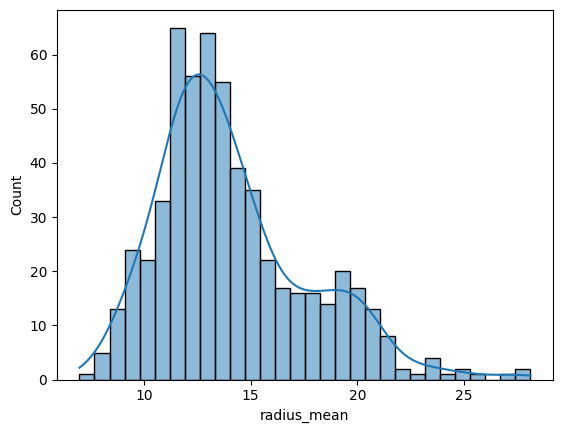

In [ ]:
sns.histplot(dado, x='radius_mean', bins=30, kde=True, stat='count');

### Texture_mean

Mede a variação dos valores de pixel ao redor do perímetro da célula, indicando a "aspereza" da superfície da célula. Maior variação indicam tumor maligno.

In [ ]:
dado['texture_mean'].value_counts().sort_index()

,count
texture_mean,
9.71,1
10.38,1
10.72,1
10.82,1
10.89,1
...,...
31.12,1
32.47,1
33.56,1


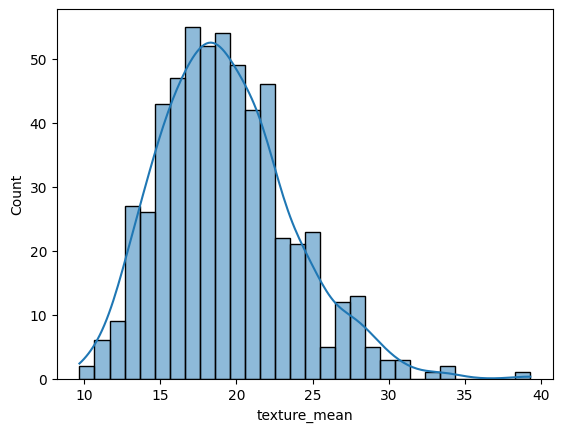

In [ ]:
sns.histplot(dado, x='texture_mean', bins=30, kde=True);

### Perimeter_mean

Média do perímetro das células. Tumores malignos têm perímetros maiores devido ao crescimento descontrolado das células.

In [ ]:
dado['perimeter_mean'].value_counts().sort_index()

,count
perimeter_mean,
43.79,1
47.92,1
47.98,1
48.34,1
51.71,1
...,...
171.50,1
174.20,1
182.10,1


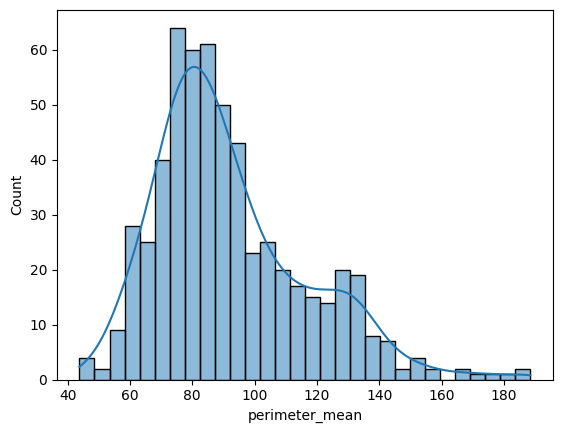

In [ ]:
sns.histplot(dado, x='perimeter_mean', bins=30, kde=True);

### Area_mean

Média da área em micrometros. Quanto maior, mais agressivo é o câncer (maligno).

In [ ]:
dado['area_mean'].value_counts().sort_index()

,count
area_mean,
143.5,1
170.4,1
178.8,1
181.0,1
201.9,1
...,...
1878.0,1
2010.0,1
2250.0,1


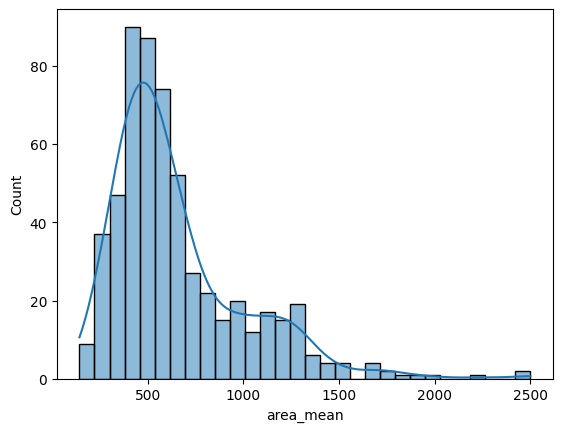

In [ ]:
sns.histplot(dado, x='area_mean', bins=30, kde=True);

### Smoothness-mean

Mede a média da suavidade do contorno da célula (variação local dos raios). Contornos menos suaves indicam malignidade.

In [ ]:
dado['smoothness_mean'].value_counts().sort_index()

,count
smoothness_mean,
0.05263,1
0.06251,1
0.06429,1
0.06576,1
0.06613,1
...,...
0.13710,1
0.13980,1
0.14250,1


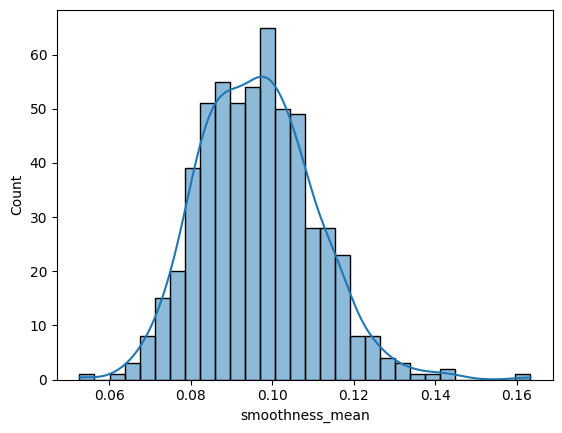

In [ ]:
sns.histplot(dado, x='smoothness_mean', bins=30, kde=True);

### Compactness_mean

Média da compactação das células. Indica quão compacta ou densa é a célula. Células malignas são menos compactas, refletindo formas mais complexas e irregulares.

In [ ]:
dado['compactness_mean'].value_counts().sort_index()

,count
compactness_mean,
0.01938,1
0.02344,1
0.02650,1
0.02675,1
0.03116,1
...,...
0.28320,1
0.28390,1
0.28670,1


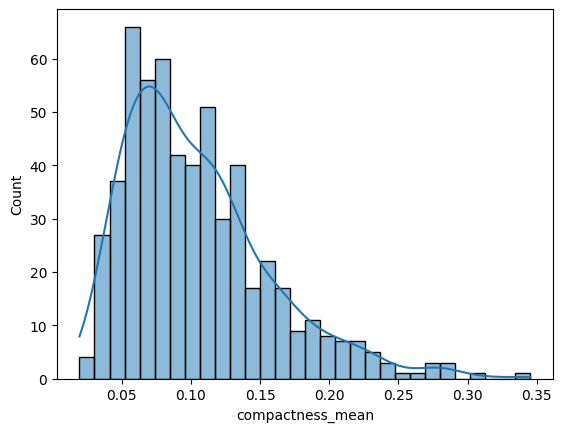

In [ ]:
sns.histplot(dado, x='compactness_mean', bins=30, kde=True);

### Concavity_mean

Média da concavidade da células, que é a medida de profundidade das partes côncavas do contorno da célula. Contornos mais côncavos indicam malignidade, por causa da forma mais irregular da célula.

In [ ]:
dado['concavity_mean'].value_counts().sort_index()

,count
concavity_mean,
0.000000,13
0.000692,1
0.000974,1
0.001194,1
0.001461,1
...,...
0.363500,1
0.375400,1
0.410800,1


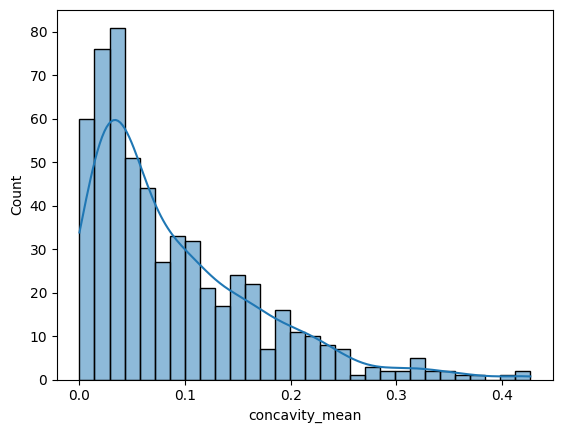

In [ ]:
sns.histplot(dado, x='concavity_mean', bins=30, kde=True);

### Concave points_mean

Média dos pontos côncavos no contorno da célula (números de pontos côncavos ao longo do contorno da célula). Quanto maior, mais maligno.

In [ ]:
dado['concave points_mean'].value_counts().sort_index()

,count
concave points_mean,
0.000000,13
0.001852,1
0.002404,1
0.002924,1
0.002941,1
...,...
0.182300,1
0.184500,1
0.187800,1


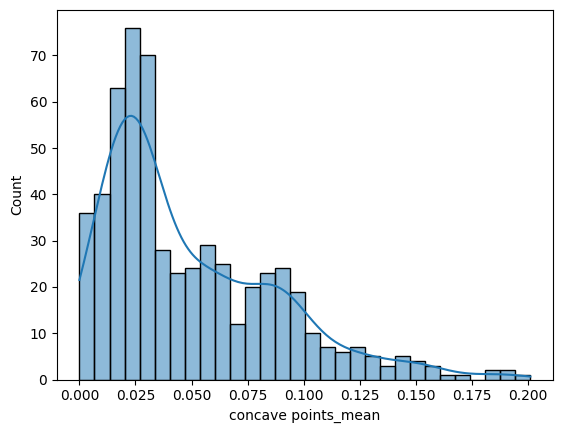

In [ ]:
sns.histplot(dado, x='concave points_mean', bins=30, kde=True);

### Symmetry_mean

Média da simetria das células, ou o quão simétrico é o contorno da célula em relação ao seu centro. Tumores malignos têm formas menos simétricas.

In [ ]:
dado['symmetry_mean'].value_counts().sort_index()

,count
symmetry_mean,
0.1060,1
0.1167,1
0.1203,1
0.1215,1
0.1220,1
...,...
0.2655,1
0.2678,1
0.2743,1


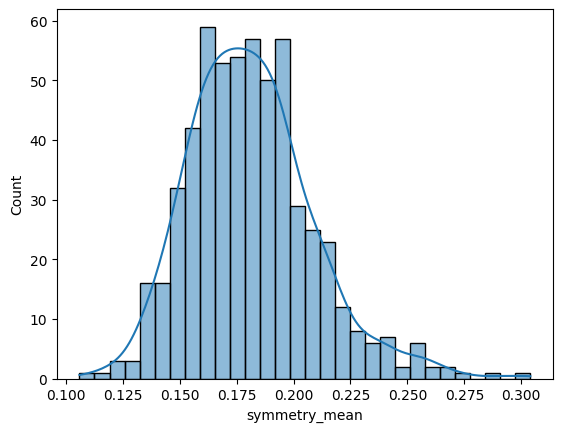

In [ ]:
sns.histplot(dado, x='symmetry_mean', bins=30, kde=True);

### Fractal_dimension_mean

Descreve a complexidade do contorno da célula (o quão detalhado é o contorno). Tumores malignos tendem a ter uma dimensão fractal maior, com contornos mais complexos e irregulares.

In [ ]:
dado['fractal_dimension_mean'].value_counts().sort_index()

,count
fractal_dimension_mean,
0.04996,1
0.05024,1
0.05025,1
0.05044,1
0.05054,1
...,...
0.08980,1
0.09296,1
0.09502,1


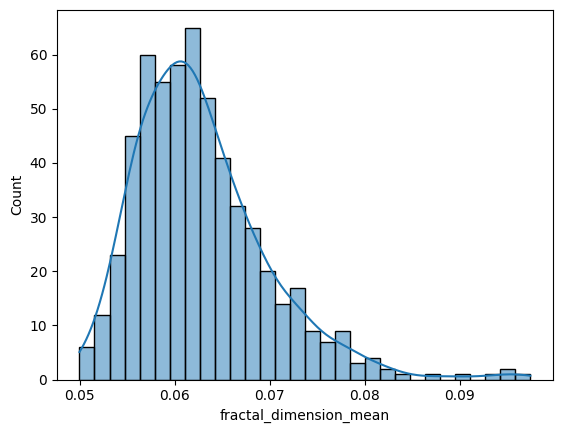

In [ ]:
sns.histplot(dado, x='fractal_dimension_mean', bins=30, kde=True);

### Conclusão inicial

Boa parte dos dados tendem a ficar próximos a zero, refletindo bastante a quantidade de tumores benignos no dataset. Tumores malignos tendem a ter valores mais altos em praticamente todos os dados.

## Tratamento

In [ ]:
cancer=dado.iloc[:, 1:12]

In [ ]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
cancer.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [ ]:
#se há múlitplos valores de frequencias, o python vai retornar várias modas
#esse método mostra apenas a "primeira moda" de cada coluna
cancer.mode().iloc[0]

,0
diagnosis,B
radius_mean,12.34
texture_mean,14.93
perimeter_mean,82.61
area_mean,512.2
smoothness_mean,0.1007
compactness_mean,0.1147
concavity_mean,0.0
concave points_mean,0.0
symmetry_mean,0.1601


**Conclusão**: As médias, moda e mediana de quase todas as variáveis estão próximas, indicando uma possível distribuição normal. Se for fazer uma análise estatística mais profunda, levar isto em consideração.

Além disso, análise de outliers não é necessária nesse caso já que os valores das variáveis são possíveis de se atingir. Ademais, as variáveis de erro padrão e pior valor foram excluídas; muitas dessas variáveis são redudantes e poderia dar problemas na criação do algoritmo.

# PRÉ-PROCESSAMENTO

## Transformando variáveis categóricas nominais em ordinais

Câncer Benigno: 0

Câncer Maligno: 1

In [ ]:
cancer2=pd.DataFrame.copy(cancer)

In [ ]:
cancer2['diagnosis'].replace({'B':0, 'M':1}, inplace=True)

In [ ]:
cancer2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## Separação dos atributos previsores e alvo

In [ ]:
previsor=cancer2.iloc[:,1:11].values
previsor

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 1.471e-01, 2.419e-01,
        7.871e-02],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 7.017e-02, 1.812e-01,
        5.667e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.279e-01, 2.069e-01,
        5.999e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 5.302e-02, 1.590e-01,
        5.648e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 1.520e-01, 2.397e-01,
        7.016e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 1.587e-01,
        5.884e-02]])

In [ ]:
alvo=cancer2.iloc[:,0].values

## Escalonamento

Será utilizado o escalonamento por padronização, ou seja, será utilizado a média e o desvio padrão como referência para os valores.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
previsor_esc=StandardScaler().fit_transform(previsor)
previsor_esc

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00, ...,
         2.53247522e+00,  2.21751501e+00,  2.25574689e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00, ...,
         5.48144156e-01,  1.39236330e-03, -8.68652457e-01],
       [ 1.57988811e+00,  4.56186952e-01,  1.56650313e+00, ...,
         2.03723076e+00,  9.39684817e-01, -3.98007910e-01],
       ...,
       [ 7.02284249e-01,  2.04557380e+00,  6.72675785e-01, ...,
         1.05777359e-01, -8.09117071e-01, -8.95586935e-01],
       [ 1.83834103e+00,  2.33645719e+00,  1.98252415e+00, ...,
         2.65886573e+00,  2.13719425e+00,  1.04369542e+00],
       [-1.80840125e+00,  1.22179204e+00, -1.81438851e+00, ...,
        -1.26181958e+00, -8.20069901e-01, -5.61032377e-01]])

In [ ]:
previsordf=pd.DataFrame(previsor_esc)
previsordf.head()

,0,1,2,3,4,5,6,7,8,9
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


In [ ]:
#agora todos os valores, até minimos e máximos, estão bem próximos um do outro
previsordf.describe()

,0,1,2,3,4,5,6,7,8,9
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00


## Resumo do pré processamento e mais algumas informações sobre o mesmo

alvo = variável que se pretende atingir (se o câncer será benigno ou maligno)

previsor = variáveis que serão usadas para prever o resultado, sem escalonar

previsor_esc = variáveis previsoras escalonadas



O uso do LabelEncoder e o OneHotEncoder foi julgado não necessário já que as variáveis previsoras já estão em formato numérico, então não é necessário transformação.

Redução de dimensionalidade também não será usada já que o número de atributos previsores não é tão grande assim.

## Separação entre treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste=train_test_split(previsor_esc, alvo, test_size=0.3, random_state=0)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive=GaussianNB()
naive.fit(x_treino, y_treino)

GaussianNB()

In [ ]:
#Usando os previsores para fazer a previsão
previsor_naive = naive.predict(x_teste)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_teste, previsor_naive)

0.9064327485380117

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsor_naive)*100))

Acurácia: 90.64%


In [ ]:
#Usando previsor, o teste teve 154 acertos na previsão
confusion_matrix(y_teste, previsor_naive)

array([[100,   8],
       [  8,  55]])

In [ ]:
print(classification_report(y_teste, previsor_naive))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       108
           1       0.87      0.87      0.87        63

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



In [ ]:
#Agora estão prevendo usando os dados de treino
previsor_treino=naive.predict(x_treino)

In [ ]:
accuracy_score(y_treino, previsor_treino)

0.9221105527638191

In [ ]:
confusion_matrix(y_treino, previsor_treino)

array([[237,  12],
       [ 19, 130]])

## Validação Cruzada

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold=KFold(n_splits=30, shuffle=True, random_state=1)

In [ ]:
modelo = GaussianNB()
resultado = cross_val_score(modelo, previsor_esc, alvo, cv=kfold)

In [ ]:
print('Acurácia Média: %.2f%%' % (resultado.mean()*100))

Acurácia Média: 91.21%


Naive Bayes = 90,64% (154 acertos)

Validação Cruzada = 91,21% (previsor_esc)

# Máquina de Vetores de Suporte

In [ ]:
from sklearn.svm import SVC

In [ ]:
#Quanto maior C, mais o algortimo se adapta ao treinameto, com risco de overfitting
svm = SVC(kernel='rbf', random_state=1, C=3)
svm.fit(x_treino, y_treino)

SVC(C=3, random_state=1)

In [ ]:
previsor_svm= svm.predict(x_teste)

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsor_svm)*100))

Acurácia: 95.91%


In [ ]:
confusion_matrix(y_teste, previsor_svm)

array([[107,   1],
       [  6,  57]])

In [ ]:
print(classification_report(y_teste, previsor_svm))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
previsor_treino = svm.predict(x_treino)

In [ ]:
accuracy_score(y_treino, previsor_treino)

0.9673366834170855

In [ ]:
confusion_matrix(y_treino, previsor_treino)

array([[244,   5],
       [  8, 141]])

## Validação Cruzada

In [ ]:
kfold = KFold(n_splits=30, shuffle=True, random_state=1)

In [ ]:
modelo=SVC(kernel='rbf', random_state=1, C=3)
resultado=cross_val_score(modelo, previsor_esc, alvo, cv=kfold)

In [ ]:
print('Acurácia: %.2f%%' % (resultado.mean()*100))

Acurácia: 95.43%


Naive Bayes = 90,64% (154 acertos) - Validação Cruzada = 91,21% (previsor_esc)

SVM = 95,91% (164 acertos) - Validação Cruzada = 95,43% (kernel='rbf', random_state=1, C=3, previsor_esc)

# Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistica = LogisticRegression(random_state=1, max_iter=100, penalty='l2', tol=0.0001, C=1, solver='lbfgs')
logistica.fit(x_treino, y_treino)

LogisticRegression(C=1, random_state=1)

In [ ]:
logistica.intercept_

array([-0.60310049])

In [ ]:
logistica.coef_

array([[ 0.87658682,  1.32668761,  0.86718692,  1.02556913,  0.95204215,
         0.17821943,  0.97627093,  1.52547754,  0.39353788, -0.55509691]])

In [ ]:
previsor_logistica = logistica.predict(x_teste)

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsor_logistica)*100))

Acurácia: 94.15%


In [ ]:
confusion_matrix(y_teste, previsor_logistica)

array([[105,   3],
       [  7,  56]])

In [ ]:
print(classification_report(y_teste, previsor_logistica))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
previsor_treino = logistica.predict(x_treino)

In [ ]:
accuracy_score(y_treino, previsor_treino)

0.9447236180904522

In [ ]:
confusion_matrix(y_treino, previsor_treino)

array([[241,   8],
       [ 14, 135]])

## Validação Cruzada

In [ ]:
kfold= KFold(n_splits=30, shuffle=True, random_state=1)

In [ ]:
modelo=LogisticRegression(random_state=1, max_iter=100, penalty='l2', tol=0.0001, C=1, solver='lbfgs')
resultado=cross_val_score(modelo, previsor_esc, alvo, cv=kfold)

In [ ]:
print("Acurácia Média: %.2f%%" % (resultado.mean()*100))

Acurácia Média: 93.85%


Naive Bayes = 90,64% (154 acertos) - Validação Cruzada = 91,21% (previsor_esc)

SVM = 95,91% (164 acertos) - Validação Cruzada = 95,43% (kernel='rbf', random_state=1, C=3, previsor_esc)

Regressão Logística = 94,15% (161 acertos) - Validação Cruzada = 93,85% (random_state=1, max_iter=100, penalty='l2', tol=0.0001, C=1, solver='lbfgs', previsor_esc)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=1)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=15, p=1)

In [ ]:
previsor_knn = knn.predict(x_teste)

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsor_knn)*100))

Acurácia: 92.98%


In [ ]:
confusion_matrix(y_teste, previsor_knn)

array([[103,   5],
       [  7,  56]])

In [ ]:
previsor_treino = knn.predict(x_treino)

In [ ]:
accuracy_score(y_treino, previsor_treino)

0.9522613065326633

In [ ]:
confusion_matrix(y_treino, previsor_treino)

array([[241,   8],
       [ 11, 138]])

## Validação Cruzada

In [ ]:
kfold = KFold(n_splits=30, shuffle=True, random_state=1)

In [ ]:
modelo=KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=1)
resultado=cross_val_score(modelo, previsor_esc, alvo, cv=kfold)

In [ ]:
print("Acurácia Média: %.2f%%" % (resultado.mean()*100))

Acurácia Média: 94.03%


Naive Bayes = 90,64% (154 acertos) - Validação Cruzada = 91,21% (previsor_esc)

SVM = 95,91% (164 acertos) - Validação Cruzada = 95,43% (kernel='rbf', random_state=1, C=3, previsor_esc)

Regressão Logística = 94,15% (161 acertos) - Validação Cruzada = 93,85% (random_state=1, max_iter=100, penalty='l2', tol=0.0001, C=1, solver='lbfgs', previsor_esc)

KNN = 91,23% (156 acertos) - Validação Cruzada = 94,03% (n_neighbors=15, metric='minkowski', p=1, pode usar tanto previsor quanto previsor_esc)

# Decision Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore=DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=3)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
previsor_arvore=arvore.predict(x_teste)

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsor_arvore)*100))

Acurácia: 92.98%


In [ ]:
confusion_matrix(y_teste, previsor_arvore)

array([[103,   5],
       [  7,  56]])

In [ ]:
previsor_treino=arvore.predict(x_treino)

In [ ]:
accuracy_score(y_treino, previsor_treino)

0.9623115577889447

In [ ]:
confusion_matrix(y_treino, previsor_treino)

array([[245,   4],
       [ 11, 138]])

## Validação Cruzada

In [ ]:
kfold=KFold(n_splits=30, shuffle=True, random_state=1)

In [ ]:
modelo=DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=3)
resultado=cross_val_score(modelo, previsor, alvo, cv=kfold)

In [ ]:
print('Acurácia: %.2f%%' % (resultado.mean()*100))

Acurácia: 91.58%


Naive Bayes = 90,64% (154 acertos) - Validação Cruzada = 91,21% (previsor_esc)

SVM = 95,91% (164 acertos) - Validação Cruzada = 95,43% (kernel='rbf', random_state=1, C=3, previsor_esc)

Regressão Logística = 94,15% (161 acertos) - Validação Cruzada = 93,85% (random_state=1, max_iter=100, penalty='l2', tol=0.0001, C=1, solver='lbfgs', previsor_esc)

KNN = 91,23% (156 acertos) - Validação Cruzada = 94,03% (n_neighbors=15, metric='minkowski', p=1, previsor ou previsor_esc)

Decision Tree = 92,98% (159 acertos) - Validação Cruzada = 91,58% (criterion='gini', random_state=1, max_depth=3, previsor ou previsor_esc)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random=RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=1, max_depth=5)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=150,
                       random_state=1)

In [ ]:
previsor_random=random.predict(x_teste)

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsor_random)*100))

Acurácia: 93.57%


In [ ]:
confusion_matrix(y_teste, previsor_random)

array([[101,   7],
       [  4,  59]])

In [ ]:
print(classification_report(y_teste, previsor_random))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
previsor_treino = random.predict(x_treino)

In [ ]:
accuracy_score(y_treino, previsor_treino)

0.9798994974874372

In [ ]:
confusion_matrix(y_teste, previsor_random)

array([[101,   7],
       [  4,  59]])

## Validação Cruzada

In [ ]:
kfold=KFold(n_splits=30, shuffle=True, random_state=1)

In [ ]:
modelo=RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=1, max_depth=5)
resultado=cross_val_score(modelo, previsor_esc, alvo, cv=kfold)

In [ ]:
print('Acurácia: %.2f%%' % (resultado.mean()*100))

Acurácia: 93.32%


Naive Bayes = 90,64% (154 acertos) - Validação Cruzada = 91,21% (previsor_esc)

SVM = 95,91% (164 acertos) - Validação Cruzada = 95,43% (kernel='rbf', random_state=1, C=3, previsor_esc)

Regressão Logística = 94,15% (161 acertos) - Validação Cruzada = 93,85% (random_state=1, max_iter=100, penalty='l2', tol=0.0001, C=1, solver='lbfgs', previsor_esc)

KNN = 91,23% (156 acertos) - Validação Cruzada = 94,03% (n_neighbors=15, metric='minkowski', p=1, previsor ou previsor_esc)

Decision Tree = 92,98% (159 acertos) - Validação Cruzada = 91,58% (criterion='gini', random_state=1, max_depth=3, previsor ou previsor_esc)

Random Forest = 93,57% (160 acertos) - Validação Cruzada = 93,32% (n_estimators=150, criterion='entropy', random_state=1, max_depth=5, previsor ou previsor_esc)

# XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg= XGBClassifier(max_depth=3, learning_rate=0.05, n_estimators=100, objective='binary:logistic', random_state=1)
xg.fit(x_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
previsor_xg=xg.predict(x_teste)

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsor_xg)*100))

Acurácia: 94.15%


In [ ]:
confusion_matrix(y_teste, previsor_xg)

array([[104,   4],
       [  4,  59]])

In [ ]:
print(classification_report(y_teste, previsor_xg))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
previsor_treino = xg.predict(x_treino)

In [ ]:
accuracy_score(y_treino, previsor_treino)

0.9798994974874372

## Validação Cruzada

In [ ]:
kfold= KFold(n_splits=30, shuffle=True, random_state=1)

In [ ]:
modelo=XGBClassifier(max_depth=3, learning_rate=0.05, n_estimators=100, objective='binary:logistic', random_state=1)
resultado=cross_val_score(modelo, previsor_esc, alvo, cv=kfold)

In [ ]:
print('Acurácia: %.2f%%' % (resultado.mean()*100))

Acurácia: 94.21%


Naive Bayes = 90,64% (154 acertos) - Validação Cruzada = 91,21% (previsor_esc)

SVM = 95,91% (164 acertos) - Validação Cruzada = 95,43% (kernel='rbf', random_state=1, C=3, previsor_esc)

Regressão Logística = 94,15% (161 acertos) - Validação Cruzada = 93,85% (random_state=1, max_iter=100, penalty='l2', tol=0.0001, C=1, solver='lbfgs', previsor_esc)

KNN = 91,23% (156 acertos) - Validação Cruzada = 94,03% (n_neighbors=15, metric='minkowski', p=1, previsor ou previsor_esc)

Decision Tree = 92,98% (159 acertos) - Validação Cruzada = 91,58% (criterion='gini', random_state=1, max_depth=3, previsor ou previsor_esc)

Random Forest = 93,57% (160 acertos) - Validação Cruzada = 93,32% (n_estimators=150, criterion='entropy', random_state=1, max_depth=5, previsor ou previsor_esc)

XGBoost = 94,15% (163 acertos) - Validação Cruzada = 94,21% (max_depth=3, learning_rate=0.05, n_estimators=100, objective='binary:logistic', random_state=1, previsor ou previsor_esc)

# CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
previsor2=cancer2.iloc[:,1:11]

In [ ]:
alvo2=cancer2.iloc[:,0]

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsor2, alvo2, test_size=0.3, random_state=1)

In [ ]:
catboost = CatBoostClassifier(task_type='CPU', iterations=150, learning_rate=0.1, depth=2, random_state=1, eval_metric='Accuracy')

In [ ]:
catboost.fit(x_treino, y_treino, plot=True, eval_set=(x_teste, y_teste))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.9170854	test: 0.9064327	best: 0.9064327 (0)	total: 534us	remaining: 79.6ms
1:	learn: 0.9195980	test: 0.9064327	best: 0.9064327 (0)	total: 1.93ms	remaining: 143ms
2:	learn: 0.9271357	test: 0.9181287	best: 0.9181287 (2)	total: 3.48ms	remaining: 171ms
3:	learn: 0.9271357	test: 0.9181287	best: 0.9181287 (2)	total: 4.37ms	remaining: 159ms
4:	learn: 0.9271357	test: 0.9181287	best: 0.9181287 (2)	total: 5.69ms	remaining: 165ms
5:	learn: 0.9246231	test: 0.9122807	best: 0.9181287 (2)	total: 6.75ms	remaining: 162ms
6:	learn: 0.9246231	test: 0.9122807	best: 0.9181287 (2)	total: 7.77ms	remaining: 159ms
7:	learn: 0.9271357	test: 0.9181287	best: 0.9181287 (2)	total: 8.92ms	remaining: 158ms
8:	learn: 0.9296482	test: 0.9181287	best: 0.9181287 (2)	total: 10ms	remaining: 157ms
9:	learn: 0.9296482	test: 0.9181287	best: 0.9181287 (2)	total: 11.1ms	remaining: 155ms
10:	learn: 0.9271357	test: 0.9122807	best: 0.9181287 (2)	total: 12.3ms	remaining: 155ms
11:	learn: 0.9221106	test: 0.9181287	best: 0

In [ ]:
previsor_cat=catboost.predict(x_teste)

In [ ]:
print('Acurácia: %.2f%%' % (accuracy_score(y_teste, previsor_cat)*100))

Acurácia: 94.74%


In [ ]:
previsor_treino = catboost.predict(x_treino)

In [ ]:
confusion_matrix(y_teste, previsor_cat)

array([[104,   4],
       [  5,  58]])

In [ ]:
accuracy_score(y_treino, previsor_treino)

0.9748743718592965

In [ ]:
confusion_matrix(y_treino, previsor_treino)

array([[246,   3],
       [  7, 142]])

## Validação Cruzada

In [ ]:
kfold = KFold(n_splits=30, shuffle=True, random_state = 5)

In [ ]:
modelo=CatBoostClassifier(task_type='CPU', iterations=150, learning_rate=0.1, depth=2, random_state=1, eval_metric='Accuracy')
resultado=cross_val_score(modelo, previsor, alvo, cv=kfold)

In [ ]:
print('Acurácia: %.2f%%' % (resultado.mean()*100))

Acurácia: 93.83%


Naive Bayes = 90,64% (154 acertos) - Validação Cruzada = 91,21% (previsor_esc)

SVM = 95,91% (164 acertos) - Validação Cruzada = 95,43% (kernel='rbf', random_state=1, C=3, previsor_esc)

Regressão Logística = 94,15% (161 acertos) - Validação Cruzada = 93,85% (random_state=1, max_iter=100, penalty='l2', tol=0.0001, C=1, solver='lbfgs', previsor_esc)

KNN = 91,23% (156 acertos) - Validação Cruzada = 94,03% (n_neighbors=15, metric='minkowski', p=1, previsor ou previsor_esc)

Decision Tree = 92,98% (159 acertos) - Validação Cruzada = 91,58% (criterion='gini', random_state=1, max_depth=3, previsor ou previsor_esc)

Random Forest = 93,57% (160 acertos) - Validação Cruzada = 93,32% (n_estimators=150, criterion='entropy', random_state=1, max_depth=5, previsor ou previsor_esc)

XGBoost = 94,15% (163 acertos) - Validação Cruzada = 94,21% (max_depth=3, learning_rate=0.05, n_estimators=100, objective='binary:logistic', random_state=1, previsor ou previsor_esc)

CatBoost = 94,74% (162 acertos) - Validação Cruzada = 93,83% (task_type='CPU', iterations=150, learning_rate=0.1, depth=2, random_state=1, eval_metric='Accuracy', previsor)

# Conclusão

O melhor algoritmo foi o Máquina de Vetor de Suporte (SVM). Não só foi o que obteve mais acertos (164 no teste) como também foi o que teve a melhor porcentagem de acertos (95,91%). Sua configuração é: kernel='rbf', random_state=1, C=3, utilizando previsor_esc (ou seja, previsores escalonados).